<a href="https://colab.research.google.com/github/mhuckvale/pals0035/blob/master/Iris_Classification_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [0]:
!pip install -q tensorflow==2.0.0-alpha0 

    100% |████████████████████████████████| 79.9MB 317kB/s 
    100% |████████████████████████████████| 3.0MB 12.2MB/s 
    100% |████████████████████████████████| 419kB 20.6MB/s 
    100% |████████████████████████████████| 61kB 18.0MB/s 


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras import utils
import numpy as np
import pandas as pd
import seaborn as sn
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import Data

In [0]:
from sklearn import datasets

COLUMN_NAMES = [
        'SepalLength', 
        'SepalWidth',
        'PetalLength', 
        'PetalWidth'
        ]

irisdata = datasets.load_iris()
data = pd.DataFrame(irisdata.data, columns=COLUMN_NAMES)
data['Species'] = pd.Series(irisdata.target)

data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Data Analysis 

## Data Types Analysis

In [0]:
data.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Species          int64
dtype: object

## Handle Categorical Variables

In [0]:
data['Species'] = data['Species'].astype("category")
data.dtypes

SepalLength     float64
SepalWidth      float64
PetalLength     float64
PetalWidth      float64
Species        category
dtype: object

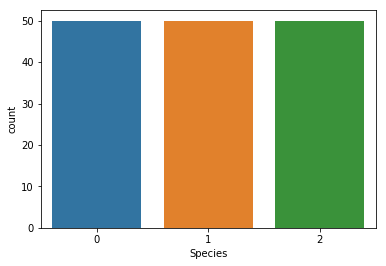

In [0]:
distribution = sn.countplot(x="Species", data=data)
plt.show(distribution)

## Missing Information

In [0]:
print(data.isnull().sum())

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64


## Correlation Analysis

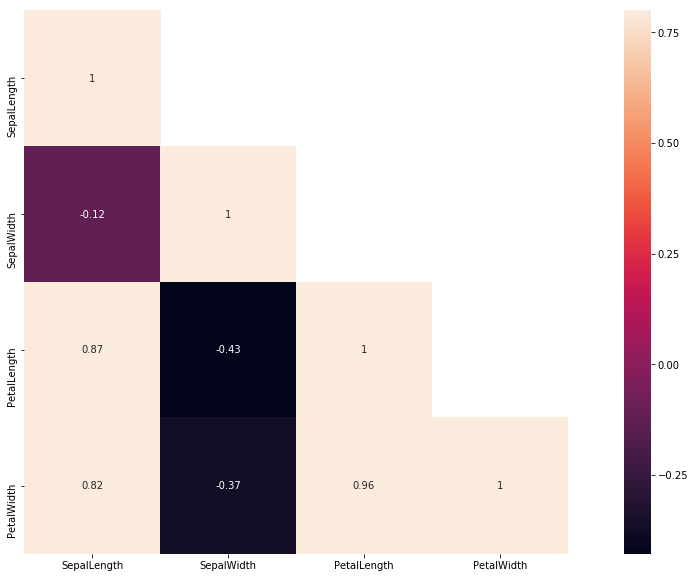

In [0]:
corrMatt = data[["SepalLength","SepalWidth","PetalLength","PetalWidth","Species"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

# Implementation

## Split Data to Test and Train

In [0]:
output_data = data["Species"]
input_data = data.drop("Species",axis=1)
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.3, random_state=42)

y_train = utils.to_categorical(y_train) 
y_test = utils.to_categorical(y_test)

print("Input training size: ", X_train.shape[0])
print("Output training size: ", y_train.shape[0])
print("Input testing size: ", X_test.shape[0])
print("Output testing size: ", y_test.shape[0])

Input training size:  105
Output training size:  105
Input testing size:  45
Output testing size:  45


In [0]:
X_train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


## Creating & compiling a model

In [0]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


## Training a model

In [0]:
model.fit(X_train, y_train, epochs=300, batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/300
105/105 [==============================] - 0s 1ms/sample - loss: 1.3232 - acc: 0.3524
Epoch 2/300
105/105 [==============================] - 0s 163us/sample - loss: 1.2750 - acc: 0.3524
Epoch 3/300
105/105 [==============================] - 0s 155us/sample - loss: 1.2362 - acc: 0.3524
Epoch 4/300
105/105 [==============================] - 0s 152us/sample - loss: 1.1995 - acc: 0.3524
Epoch 5/300
105/105 [==============================] - 0s 163us/sample - loss: 1.1691 - acc: 0.3524
Epoch 6/300
105/105 [==============================] - 0s 156us/sample - loss: 1.1376 - acc: 0.3524
Epoch 7/300
105/105 [==============================] - 0s 153us/sample - loss: 1.1109 - acc: 0.3524
Epoch 8/300
105/105 [==============================] - 0s 139us/sample - loss: 1.0794 - acc: 0.3524
Epoch 9/300
105/105 [==============================] - 0s 157us/sample - loss: 1.0499 - acc: 0.3524
Epoch 10/300
105/105 [==============================] 

## Evaluate the model

In [0]:
scores = model.evaluate(X_test, y_test)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

45/45 [==============================] - 0s 833us/sample - loss: 0.0419 - acc: 0.9778

Accuracy: 97.78%


## Predict

In [0]:
prediction = model.predict(X_test)
prediction1 = pd.DataFrame({'IRIS1':prediction[:,0],'IRIS2':prediction[:,1], 'IRIS3':prediction[:,2]})
prediction1.round(decimals=4).head()

,IRIS1,IRIS2,IRIS3
0,0.0001,0.9878,0.0121
1,0.9996,0.0004,0.0000
2,0.0000,0.0003,0.9997
3,0.0000,0.9665,0.0335
4,0.0000,0.9887,0.0113


In [0]:
real_values = pd.DataFrame(y_test)
real_values.head()

,0,1,2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
